# ID5030 Assignment-1 

### Name : Uttkarsh Jain 
### Roll no : ME19B182

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# Reading Dataset 

In [2]:
#Reading the dataset 
df = pd.read_excel('Concrete_Data.xls')

In [3]:
#head function shows the first five columns of the dataframe
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.loc[[1,3,6]]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299


In [18]:
#Finding no of data points in the dataframe
df.shape

(1030, 9)

In [4]:
#getting the actual values of columns
df.columns 

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

# 1. Creating and splitting dataset into training and testing sets 

In [5]:
#creating X data matrix and y as our target variable 
X = df.drop('Concrete compressive strength(MPa, megapascals) ',axis = 1)
y = df['Concrete compressive strength(MPa, megapascals) ']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
#verifying if the split is correct
X_train.shape,y_train.shape

((721, 8), (721,))

# 2. Fitting Linear Regression 

## In this part we are fitting a linear model of the type , y_hat = w0+w1\*x1+....w8\*x8 

In [8]:
# intializing and fitting a linear regression model 
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
# Weights for all the eight features
lr.coef_

array([ 0.12544516,  0.11677346,  0.09002765, -0.09095886,  0.39490648,
        0.02805813,  0.0363444 ,  0.11394849])

In [20]:
# Bias or the W0 value 
lr.intercept_

-59.45903972245624

# 3. Prediction on Test set 

In [9]:
#prediction on test set
y_pred_test = lr.predict(X_test)
#prediction on training set
y_pred_train = lr.predict(X_train)

# 4. Analyzing the fit 

## a. MSE and R2 value on training and test sets

In [10]:
print('training r2 score =',r2_score(y_train,y_pred_train))
print('test r2 score =',r2_score(y_test,y_pred_test))

training r2 score = 0.6196006621677799
test r2 score = 0.5943642890037377


In [11]:
print('training mean squared error =',mean_squared_error(y_train,y_pred_train))
print('test mean squared error =',mean_squared_error(y_test,y_pred_test))

training mean squared error = 107.25842311011503
test mean squared error = 109.75614063734935


## b. Plotting the y_pred againgst y_true 

Text(0, 0.5, 'y_train_predicted')

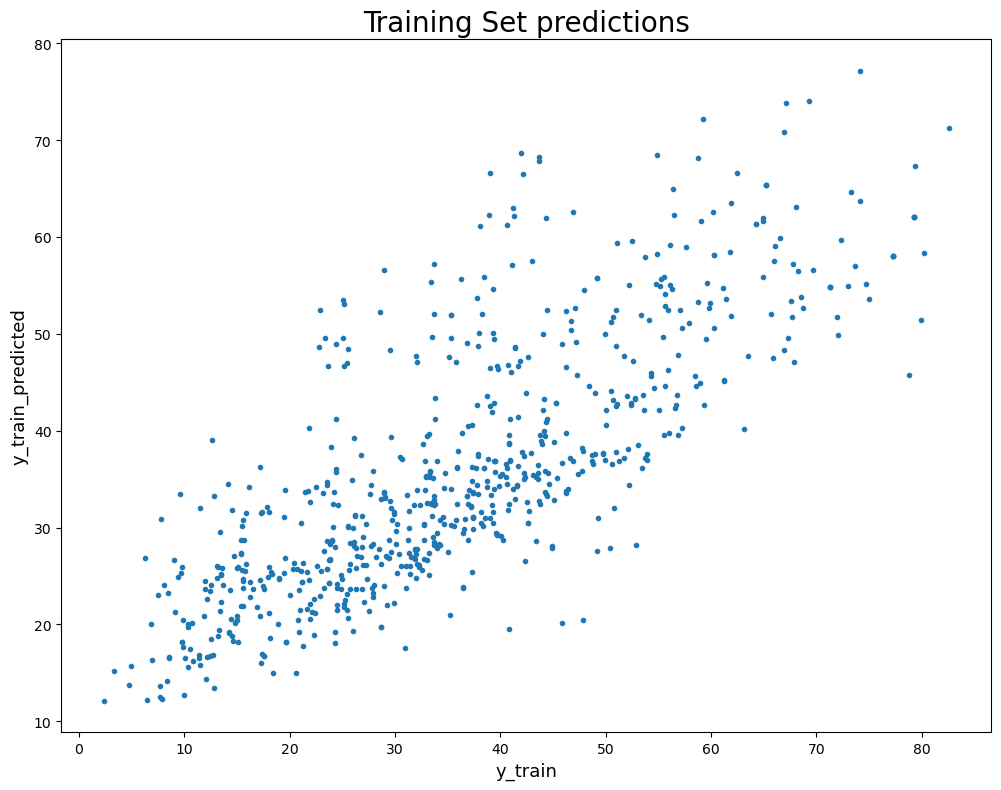

In [15]:
plt.figure(figsize=(12,9))
plt.title('Training Set predictions',size = 20)
plt.plot(y_train,y_pred_train,'.')
plt.xlabel('y_train',size = 13)
plt.ylabel('y_train_predicted',size = 13)

Text(0, 0.5, 'y_test_predicted')

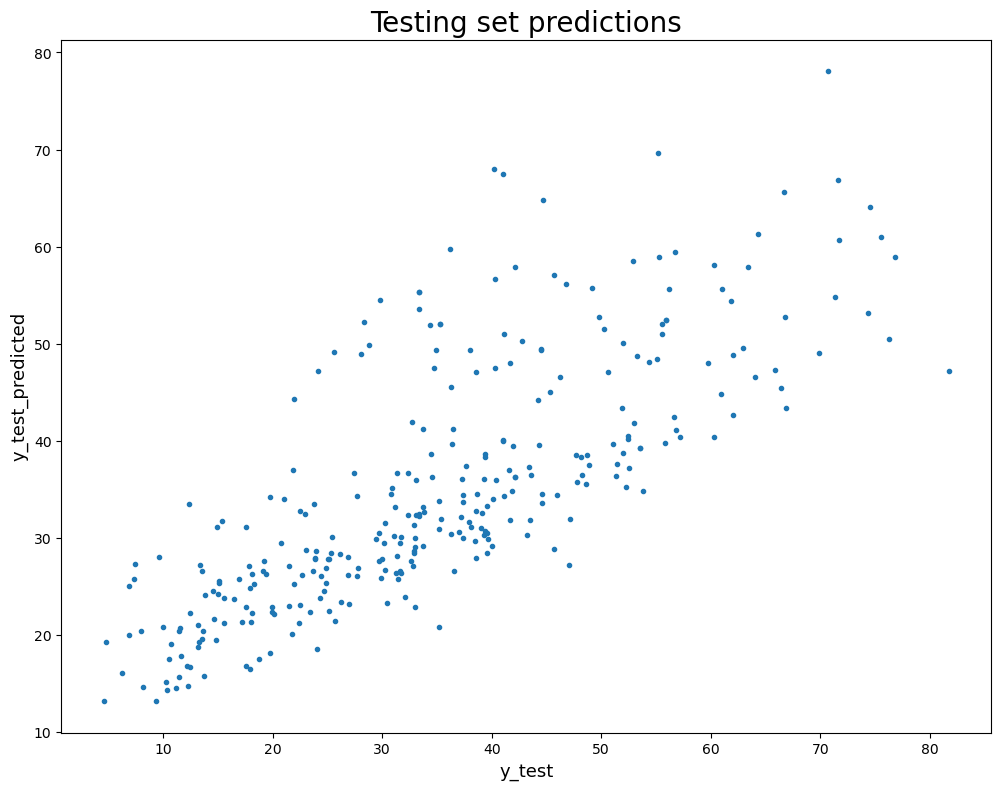

In [16]:
plt.figure(figsize=(12,9))
plt.title('Testing set predictions',size = 20)
plt.plot(y_test,y_pred_test,'.')
plt.xlabel('y_test',size = 13)
plt.ylabel('y_test_predicted',size = 13)

# 5. Creating a submission file 

In [34]:
sub = X_test.copy()
sub['Concrete compressive strength'] = y_pred_test
sub.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Concrete compressive strength
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,58.575047
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,52.452608
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28,64.105425
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,51.996814
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28,17.524758


In [35]:
sub.to_csv('submission.csv')